# Code for <span style="color:red">Adiabatic Newtonian Spherical Accretion (Bondi Flow)</span> Profile
## Here we shall be solving one ODE and one algebric equation.
### To solve the ODE we shall be using $4^{th}$ oder Runge Kutta method.
#### This code is written by <span style="color:green"> Souvik Ghose, HRI, April, &copy; 2024.</span>
#### You are free to use, modify and share the content.
#### Kindly acknowledge.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Define some Functions:
### Relevant equations:
### $\frac{1}{u^2} + n a^2 - \frac{1}{r} = \mathscr{E}$
###  $\frac{du}{dr} = \frac{\left(\frac{1}{r^2} - \frac{2a^2}{r}\right)}{\frac{a^2}{u}- u}$
#### Where $a$ = soundspeed, $u$ = advection velocity, $n = \frac{1}{\gamma - 1}$ = polytropic index
#### Values at critical point: $a_c$, $u_c$, $r_c$, $a_c = u_c = \frac{1}{2r_c}$
#### Quadratic for slope at critical point: $a\left(\frac{du}{dr}\big|_{c}\right)^2+b\left(\frac{du}{dr}\big|_{c}\right)+c = 0$
#### $a = 2 + \frac{1}{n}$, $b = \frac{3u_c}{nr_c}$, $c=\left(\frac{2}{n}-1\right)\frac{1}{r_c^3}$

#### Ref. Sandip K. Chakrabarti, [*Physics Reports* **266** (1996) 229-390.](https://arxiv.org/abs/astro-ph/9605015)

In [405]:
def critical_radius(energy, gamma):
    critical_distance = (5. - 3. * gamma)/(4. * (gamma - 1.)) * 1./energy
    return critical_distance

def critical_velocity(energy, gamma):
    return np.sqrt(2 * (gamma - 1) / (5. - 3. * gamma) * energy)

def sound_speed(energy, gamma, radius, velocity):
    n = 1./(gamma - 1)
    sound_speed = np.sqrt(1./n * (energy - 1./2 * velocity**2 + 1/radius))
    return sound_speed

def du_dr(velocity, radius):
    n = 1./(gamma - 1)
    a_square = 1./n * (energy - 1./2 * velocity**2 + 1/radius)
    slope = velocity * (2./radius * a_square - 1./radius**2) / (velocity**2 - a_square)
    return slope
def du_dr_critical(energy, gamma, v_c, r_c):
    # Quadratic: ax^2 + bx + c = 0
    
#     a = (gamma + 1)
#     b = (gamma - 1.)*(1./(v_c * r_c) + 2 * v_c/r_c)
#     c = (gamma - 1) / r_c**2 - 1./r_c**3
    n = 1 / (gamma - 1.)
    a =  (2 + 1/n)
    b = 3 * v_c * 1/(n * r_c)
    c = (2./n - 1)/r_c**3
    
    slope_1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
    slope_2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
    slope_critical = [slope_1, slope_2]
    return slope_critical

def runge_kutta(dudr, u0, r0, rn, slope_critical, N = 1000):

    h = (rn - r0) / N
    rcc =r0    

    #initializing r,u and a arrays
    r = [r0]
    u = [u0]
    

    i=0
    
    
    
    while i < N :

        
        
        if i == 0:
            k1 = h * slope_critical
        else:
        
            k1 = h * dudr(u0,r0)
        
        k2 = h * dudr(u0 + k1/2, r0 + h/2)
   
        k3 = h * dudr(u0 + k2/2, r0 + h/2)
        
        k4 = h * dudr(u0 + k3, r0 + h)
            
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    
        r.append(r0 + h)
        u.append(abs(u0 + k))
        
        
        i += 1
        
        r0 = r0 + h
        u0 = u0 + k
        
        
        
    
    return [u, r]
#     return result

def main(energy, gamma, save = 1):
    r_c = critical_radius(energy, gamma)
    v_c = critical_velocity(energy, gamma)
    a_c = v_c
    v_square = v_c**2
    print("-"*60)
    print("critical radius = %3.2e"%(r_c))
    print("log of critical radius = %3.2e"%(np.log(r_c)))
    print("critical velocity = %3.2e"%(v_c))
    print("critical sound_speed = %3.2e"%(v_c))
    print("Mach number at critical point = 1")
    slope = du_dr_critical(energy, gamma, v_c, r_c)
    print("slope at critical point:")
    print(slope)
    r_c = critical_radius(energy, gamma)
    v_c = critical_velocity(energy, gamma)
    slope_1 = du_dr_critical(energy, gamma, v_c, r_c)[0]
    slope_2 = du_dr_critical(energy, gamma, v_c, r_c)[1]

    print("-"*60)
    # Create a folder (directory)
    # Before creating if such a directory already exists
    import os
    # Directory name
    directory = "output_values"
    # Check if the directory exists
    if not os.path.exists(directory):
        # If not, create it
        os.makedirs(directory)
    # File name based on a variable value
    file_name = f"profile_{energy}_{gamma}.txt"  # Using the number of points as part of the file name

    # Create a text file with the dynamic file name,
    file_path = (os.path.join(directory, file_name))
    # The header for the text file
    text_head = "Adiabatic Bondi flow with energy = {:3.2e}, and gamma = {:3.2f}\n\n".format(energy, gamma)
    
    # Length of the header
    heading_length = len(text_head)

    # Create a string of hyphens with the same length as the header
    horizontal_line = "-" * heading_length
    # Create the complete header
    heading = f"{horizontal_line}\n\n{text_head}\n{horizontal_line}\n\n"
    # Data to be written
    formatted_text = "critical radius: {:3.2e}\nlog of critical radius: {:3.2e}\ncritical velocity: {:3.2e}\ncritical slope: {:3.2e}, {:3.2e}".format(r_c, np.log(r_c), v_c, slope[0], slope[1])
    with open(file_path, "w") as file:
    # Write the text to the file

        # write header
        file.write(heading)
        #write data
        file.write(formatted_text)


    # Close the file
    file.close()
    
    return(None)

### Run the "main" function to write the data as well as show it on the screen.

In [406]:
#Change the energy and gamma value according to your need
main(3e-5, 1.4)

------------------------------------------------------------
critical radius = 1.67e+04
log of critical radius = 9.72e+00
critical velocity = 5.48e-03
critical sound_speed = 5.48e-03
Mach number at critical point = 1
slope at critical point:
[7.516294359974774e-08, -2.3947971085129726e-07]
------------------------------------------------------------


### Modified $4^{th}$ order Runge-Kutta for drawing the profile.

In [435]:
def runge_kutta(dudr, u0, r0, rn, slope_critical, N = 1000):

    h = (rn - r0) / N
    rcc =r0    

    #initializing r,u and a arrays
    r = [r0]
    u = [u0]
    

    i=0
    
    
    
    while i < N :

        
        
        if i == 0:
            k1 = h * slope_critical
        else:
        
            k1 = h * dudr(u0,r0)
        
        k2 = h * dudr(u0 + k1/2, r0 + h/2)
   
        k3 = h * dudr(u0 + k2/2, r0 + h/2)
        
        k4 = h * dudr(u0 + k3, r0 + h)
            
        k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    
        r.append(r0 + h)
        u.append(abs(u0 + k))
        
        
        i += 1
        
        r0 = r0 + h
        u0 = u0 + k
        
        
        
    
    return [u, r]

### Draw the profile.

7.516294359974774e-08 -2.3947971085129726e-07


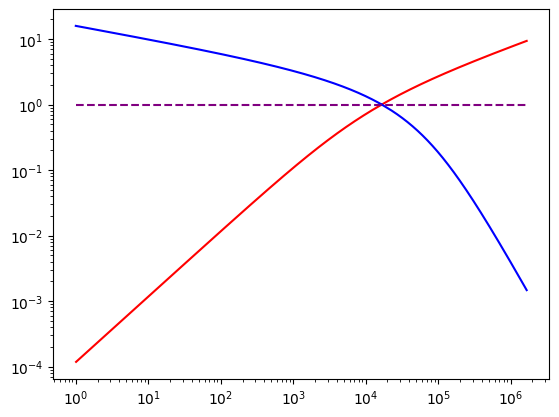

In [436]:
energy = 3e-5
gamma = 1.4
r_c = critical_radius(energy, gamma)
v_c = critical_velocity(energy, gamma)
slope_1 = du_dr_critical(energy, gamma, v_c, r_c)[0]
slope_2 = du_dr_critical(energy, gamma, v_c, r_c)[1]
steps = 100000
print(slope_1, slope_2)
def mach_number(velocity, radius):
    value_range = len(velocity)
    a = []
    m = []
    for i in range(value_range):
        a.append(sound_speed(energy, gamma, radius[i], velocity[i]))
    for j in range(value_range):
        m.append(velocity[j]/a[j])
    return m
rn = 100* r_c
u, r = runge_kutta(du_dr, v_c, r_c, rn, slope_1, steps)
m = mach_number(u, r)
rn = 1.01
u1, r1 = runge_kutta(du_dr, v_c, r_c, rn, slope_1, steps)
m1 = mach_number(u1, r1)
rn = 100* r_c
u2, r2 = runge_kutta(du_dr, v_c, r_c, rn, slope_2, steps)
m2 = mach_number(u2, r2)
rn = 1.001
u3, r3 = runge_kutta(du_dr, v_c, r_c, rn, slope_2, steps)
m3 = mach_number(u3, r3)

rfix = np.linspace(1,100*r_c, 100 )
mfix = np.ones(100)


plt.yscale("log")
plt.xscale("log")
plt.plot(r,m, color = "red")
plt.plot(r1,m1, color = "red")
plt.plot(r2,m2, color = "blue")
plt.plot(r3,m3, color = "blue")

plt.plot(rfix, mfix, color = "purple", linestyle = "dashed")
plt.show()


## Function for adding arrowhead:

In [437]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

### Making the plot look polished

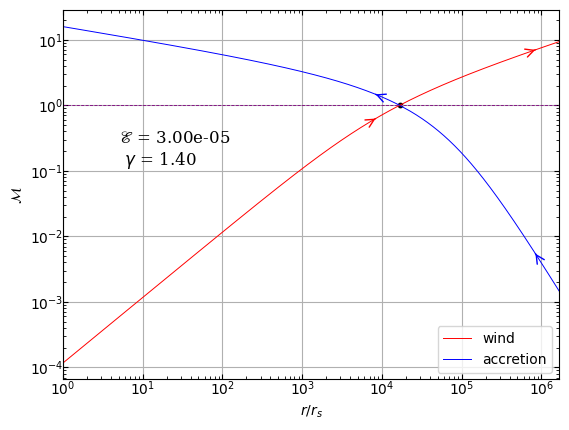

In [438]:
# Need to assing each plot some name to add arrowhed.
line = [0, 0, 0, 0]

plt.yscale("log")
plt.xscale("log")
line[0] = plt.plot(r,m, color = "red", lw =.7, label = "wind")[0]
line[1] = plt.plot(r1,m1, color = "red", lw =.7)[0]
line[2] = plt.plot(r2,m2, color = "blue", lw =.7, label = "accretion")[0]
line[3] = plt.plot(r3,m3, color = "blue", lw =.7)[0]

# Arrowhead direction
dirk =['right', 'left', 'left', 'right']

for j in range(4):
    add_arrow(line[j], position=None, direction=dirk[j], size=15, color=None)

# Draw a horizontal line for Mach number = 1.
plt.plot(rfix, mfix, color = "purple", linestyle = "dashed", lw= .6)
# Show the critical/sonic point.
plt.scatter([r_c],[1], color = "black", s = 10, marker = 'o')
# Set x axis limit to fill the plot area
plt.xlim(1, 100*r_c)

#------------------------------ Plot Formatting ------------------------------------------

# Adjust the axes' ticks
plt.tick_params(axis='x', direction='in', pad = -0, top = True, right = True, which='both')
plt.tick_params(axis='y', direction='in', pad = -0, top = True, right = True, which='both')
# Label the axes.
plt.ylabel("$\mathcal{M}$")
plt.xlabel(r"$r/r_s$")
# Show the energy and gamma value inside the plot.
plt.text(5, 10e-2, "$\mathscr{E}$ = %3.2e \n $\gamma$ = %3.2f"%(energy,gamma), color='black', fontsize=12, ha='left', va='bottom', fontfamily = "serif")
# Add gridlines
plt.grid(True)
plt.legend()

#------------------------------ Plot Saving ------------------------------------------


# Create a folder (directory)
# Before creating if such a directory already exists
import os
# Directory name
directory = "plots"
# Check if the directory exists
if not os.path.exists(directory):
    # If not, create it
    os.makedirs(directory)
# File name based on a variable value
file_name = f"profile_{energy}_{gamma}.pdf"  # Using the number of points as part of the file name

# Save the plot inside the directory with the dynamic file name,
# setting DPI and bounding box
plt.savefig(os.path.join(directory, file_name), dpi=300, bbox_inches='tight')
# Show plot

#------------------------------ Plot Display ------------------------------------------

plt.show()

### Store data for future use.

In [462]:
# All the integrations starts from r_c. So for the one where it goes inside the data needs to be reversed.
#[::-1] reverses the list or array, in this case list. "+" simply concatenate two lists.

wind_radius=r1[::-1]+r
wind_mach_number=m1[::-1]+m
accretion_radius=r3[::-1]+r2
accretion_mach_number=m3[::-1]+m2

# File path

directory_name = "data_bondi"

if not os.path.exists(directory_name):
    # If not, create it
    os.makedirs(directory_name)

wind_file_name = f"{energy}_{gamma}_wind.dat"
wind_file_path = os.path.join(directory_name, wind_file_name)

with open(wind_file_path,"w") as file:
    for xval, yval in zip(wind_radius, wind_mach_number):
        file.write(f"{xval} {yval}\n")
file.close()

accretion_file_name = f"{energy}_{gamma}_accretion.dat"
accretion_file_path = os.path.join(directory_name, accretion_file_name)

with open(accretion_file_path,"w") as file:
    for xval, yval in zip(accretion_radius, accretion_mach_number):
        file.write(f"{xval} {yval}\n")

file.close()


### Redifine the arrowhead function to add to heads per line.

In [486]:
def add_arrow_2(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = [xdata.mean(), xdata.mean()/300]
    # find closest index
    for pos in position:
        start_ind = np.argmin(np.absolute(xdata - pos))
        if direction == 'right':
            end_ind = start_ind + 1
        else:
            end_ind = start_ind - 1

        line.axes.annotate('',
            xytext=(xdata[start_ind], ydata[start_ind]),
            xy=(xdata[end_ind], ydata[end_ind]),
            arrowprops=dict(arrowstyle="->", color=color),
            size=size
    )

### Make the plot from the saved data file.

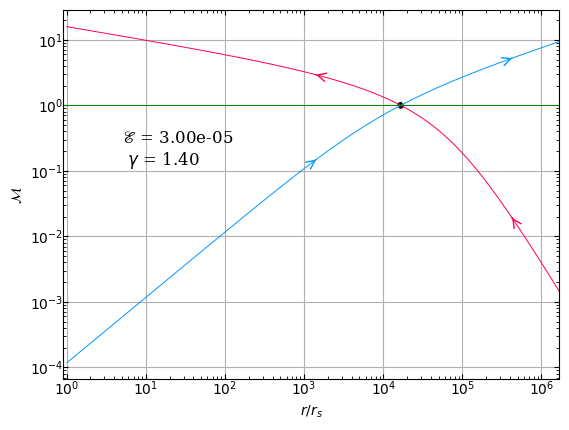

In [494]:
# File path
line = [0, 0]
# Load data from the .dat file
data = np.loadtxt(wind_file_path)

# If the file has multiple columns, you can split them into separate lists
x = data[:, 0]  # First column
y = data[:, 1]  # Second column

line[0] = plt.plot(x, y, color="#0096FF", lw = .7)[0]

# Load data from the .dat file
data = np.loadtxt(accretion_file_path)

# If the file has multiple columns, you can split them into separate lists
x = data[:, 0]  # First column
y = data[:, 1]  # Second column

line[1] = plt.plot(x, y, color="#FF004D", lw = .7)[0]


#--------------------------------- The styling part---------------------------------

dirk =['right', 'left']

for j in range(2):
    add_arrow(line[j], position=None, direction=dirk[j], size=15, color=None)
plt.xlim(x[0]-.1, x[-1])
plt.xscale("log")
plt.yscale("log")
plt.scatter([r_c],[1], color = "black", s = 15, marker = "o", linestyle="dashed")
plt.plot([x[0]-.1, x[-1]],[1,1], color = "green", lw = .7)
plt.tick_params(axis='x', direction='in', pad = -0, top = True, right = True, which='both')
plt.tick_params(axis='y', direction='in', pad = -0, top = True, right = True, which='both')
plt.ylabel("$\mathcal{M}$")
plt.xlabel(r"$r/r_s$")
# Show the energy and gamma value inside the plot.
plt.text(5, 10e-2, "$\mathscr{E}$ = %3.2e \n $\gamma$ = %3.2f"%(energy,gamma), color='black', fontsize=12, ha='left', va='bottom', fontfamily = "serif")
plt.grid(True)


plt.show()

#### To convert this notebook <span style="color:red">(bondi_accretion_adiabatic.ipynb)</span> into a .py script use: *<span style="color:brown">"jupyter nbconvert --to script bondi_accretion_adiabatic.ipynb"</span>* in the terminal.